COMPLETE WAVEGUIDE SIMULATION ANALYSIS
CORRECTED 3-LAYER STRUCTURE:
1. SiO₂ BOX (2.0 μm) - TOP LAYER
2. Poly-Si (0.1-3.0 μm) - MIDDLE LAYER
3. Si Substrate (5.0 μm) - BOTTOM LAYER
4. Cu Waveguides (3.0 μm) - On top of SiO₂
5. All WG Lengths: L1=L2=L3=4.0 mm
Wavelength Range: 299.8 - 30.0 mm
Frequency Range: 1.0 - 10.0 GHz
Voltage Range: -1.0 - 1.0 V

1. CORRECTED GEOMETRY VISUALIZATION


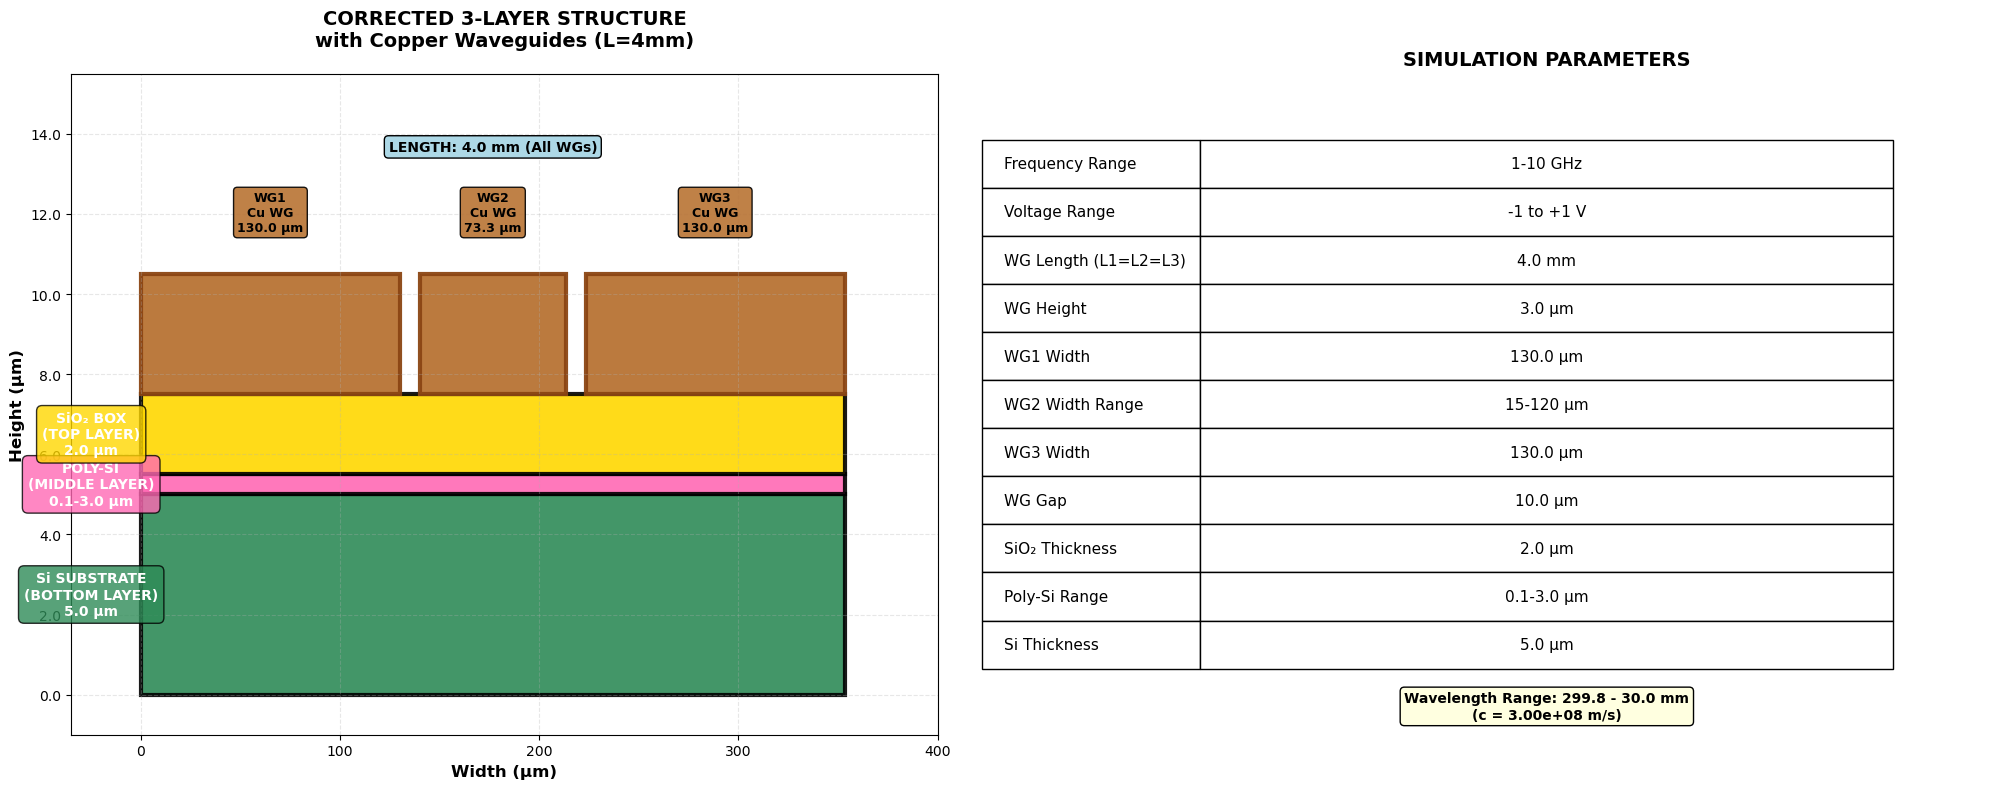


2. CONDUCTIVITY ANALYSIS IN POLY-SI MIDDLE LAYER


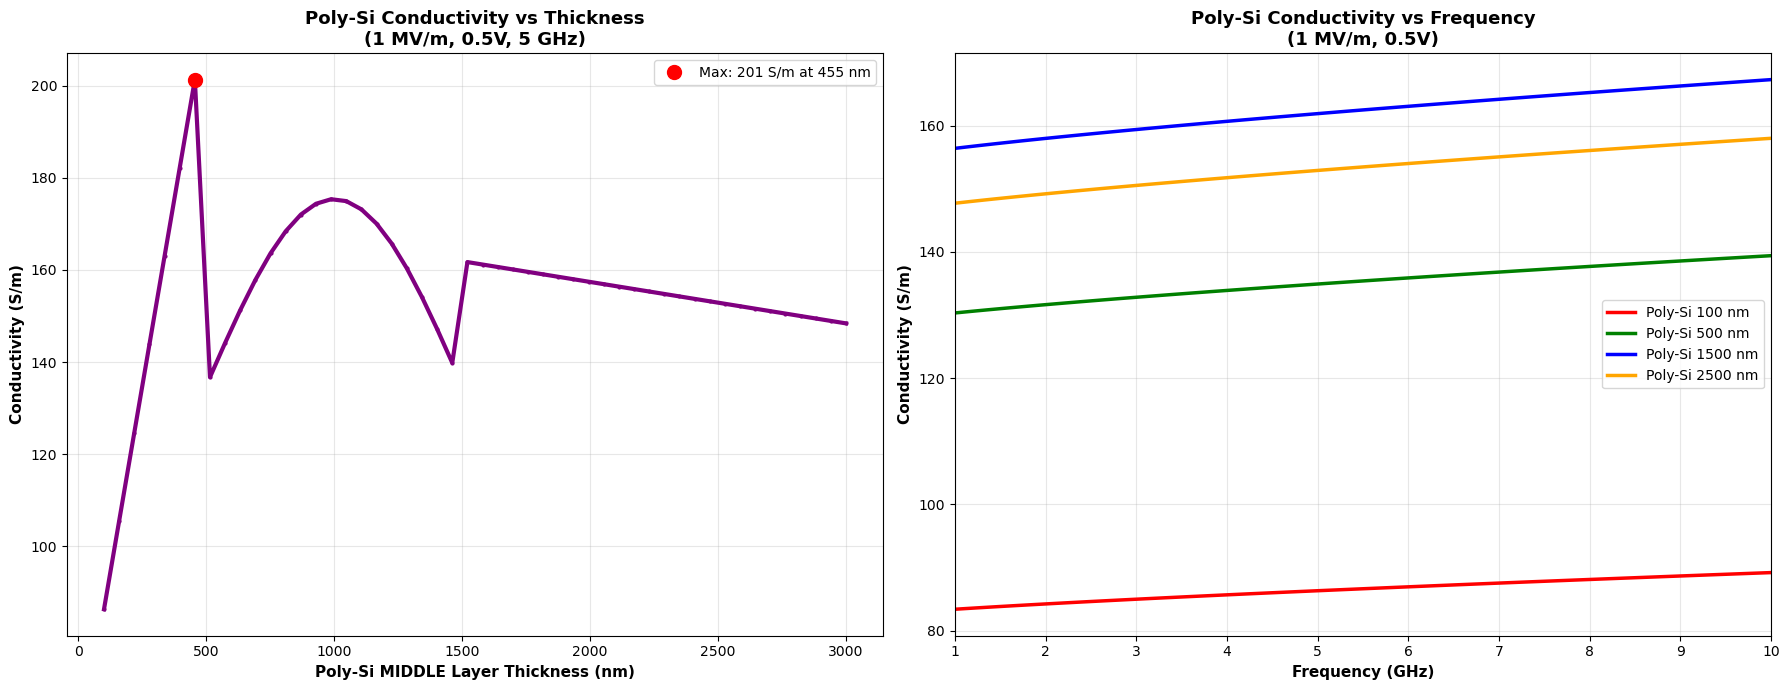


3. S-PARAMETERS ANALYSIS


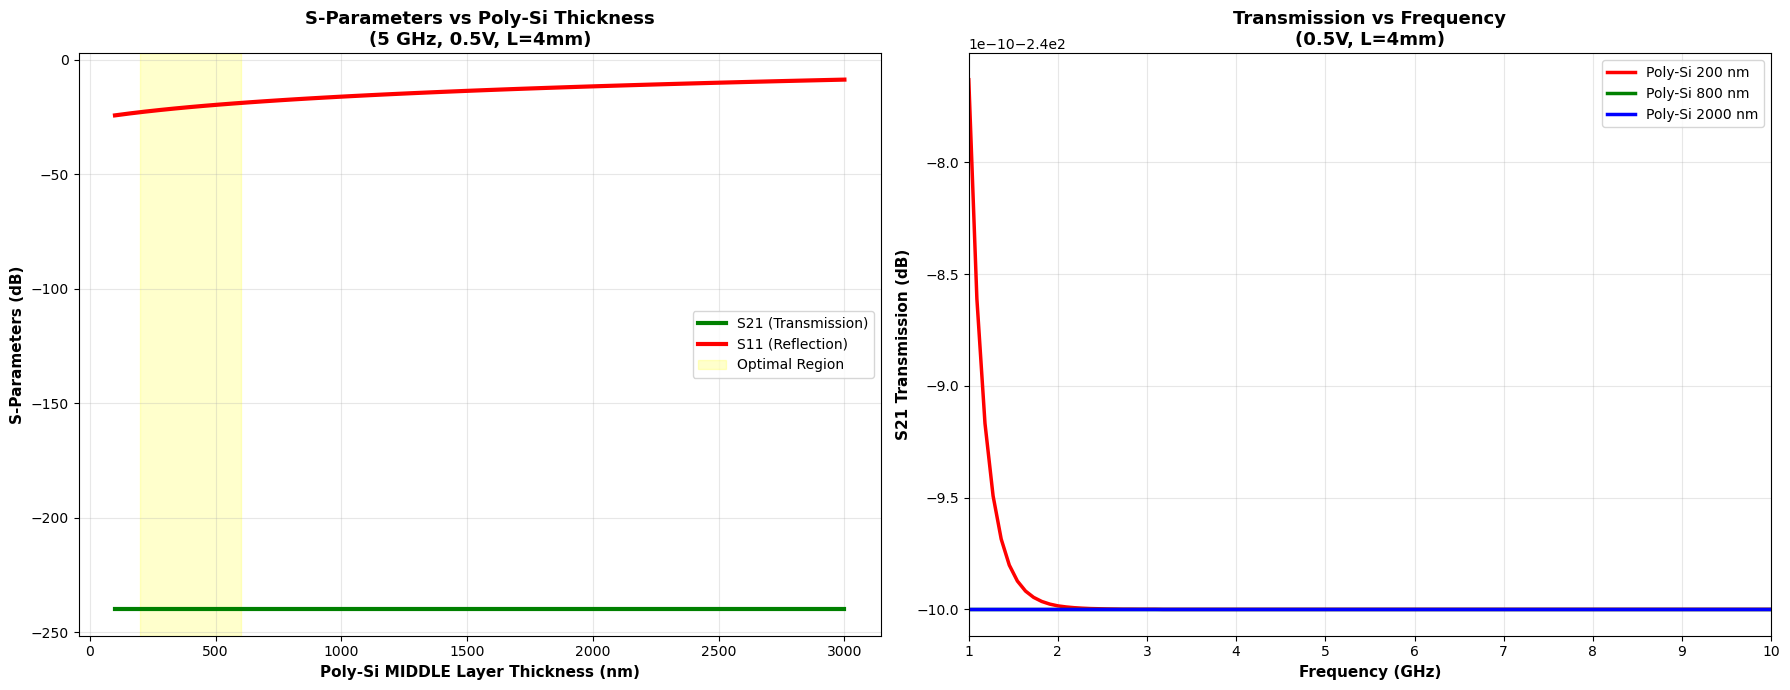


4. VOLTAGE DEPENDENCE ANALYSIS


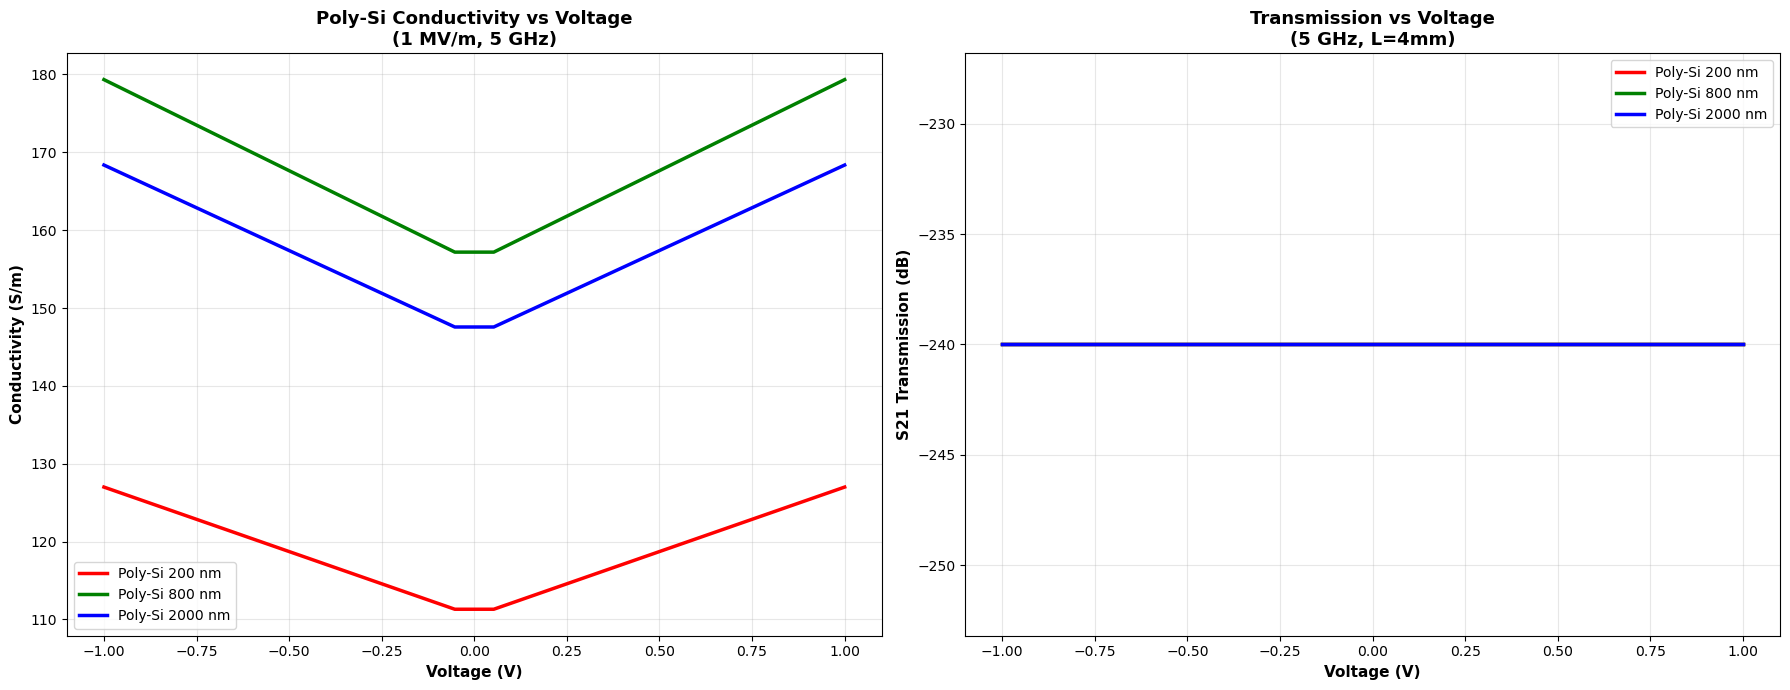


5. PERFORMANCE OPTIMIZATION


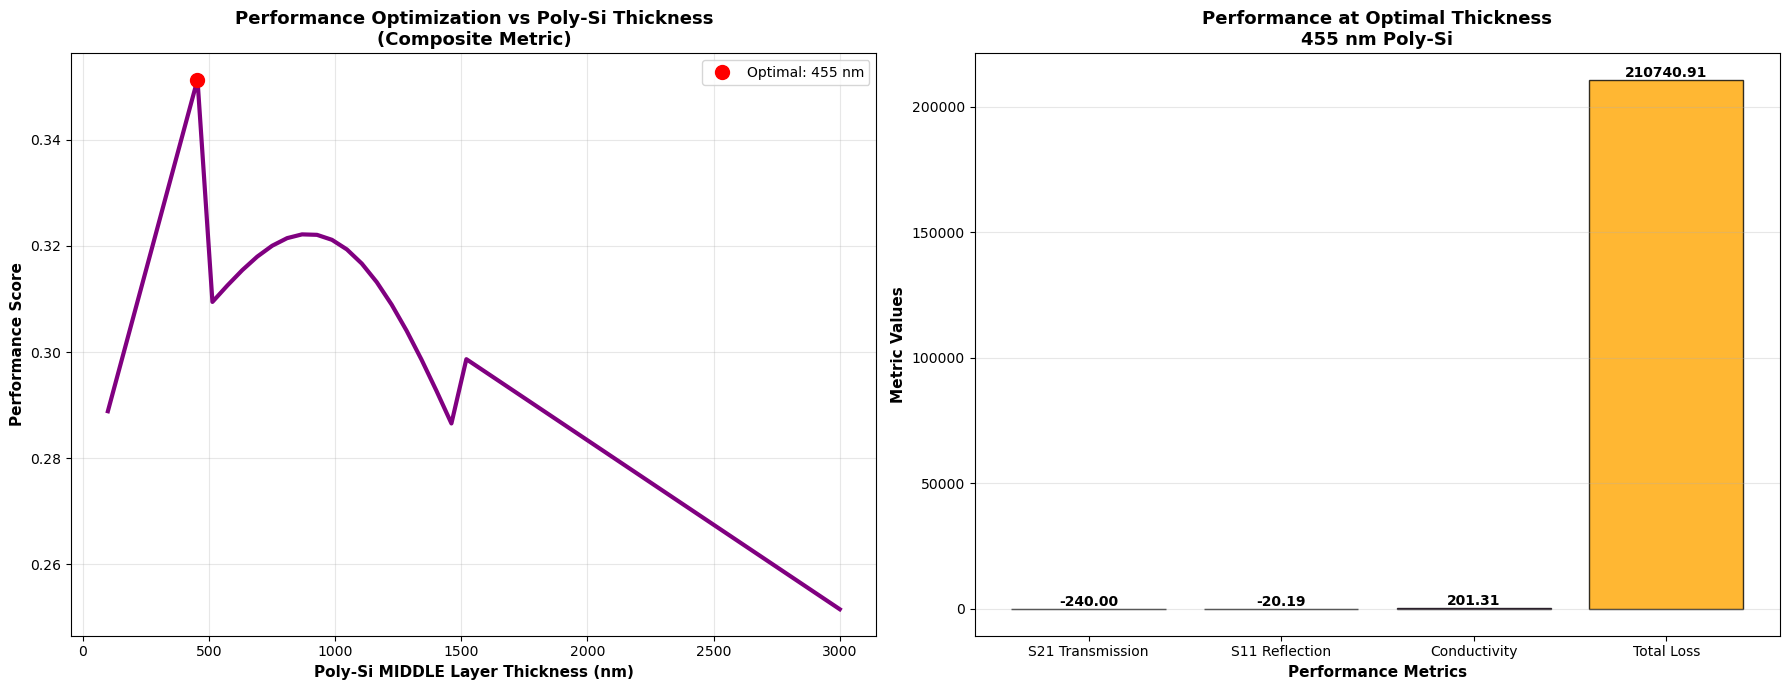


FINAL SIMULATION RESULTS
Optimal Poly-Si MIDDLE Layer Thickness: 455 nm
S21 Transmission: -240.00 dB
S11 Reflection: -20.19 dB
Poly-Si Conductivity: 201.3 S/m
Total Loss: 210740.91 dB/m


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches

class CorrectedWaveguideAnalysis:
    def __init__(self):
        # Physical constants
        self.c = c
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Copper properties
        self.sigma_cu = 5.96e7
        self.rho_cu = 1.68e-8
        
        # Material properties
        self.n_si = 3.45
        self.n_polysi = 3.50
        self.n_sio2 = 1.45
        
        # Copper Waveguide dimensions
        self.W1 = 130e-6
        self.W2_range = np.linspace(15e-6, 120e-6, 10)
        self.W3 = 130e-6
        self.H = 3e-6
        self.L = 4e-3  # All waveguides same length
        self.gap = 10e-6
        
        # CORRECTED Layer thicknesses
        self.t_sio2 = 2e-6      # SiO₂ BOX - TOP LAYER
        self.t_polysi_range = np.linspace(0.1e-6, 3e-6, 50)  # Poly-Si - MIDDLE LAYER (0.1-3 μm)
        self.t_si = 5e-6        # Si Substrate - BOTTOM LAYER (5 μm)
        
        # Simulation parameters
        self.freq_range = np.linspace(1e9, 10e9, 100)  # 1-10 GHz
        self.voltage_range = np.linspace(-1, 1, 20)    # -1V to +1V
        self.wavelength_range = self.c / self.freq_range

    def plot_corrected_geometry(self):
        """Plot CORRECTED three-layer structure with proper dimensions"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Enhanced color scheme
        colors = {
            'sio2': '#FFD700',    # Gold - SiO₂ BOX (TOP LAYER)
            'polysi': '#FF69B4',  # Hot Pink - Poly-Si (MIDDLE LAYER)
            'si': '#2E8B57',      # Sea Green - Si Substrate (BOTTOM LAYER)
            'cu_wg': '#B87333'    # Copper - Waveguides (ON TOP)
        }
        
        # Calculate dimensions
        W2 = self.W2_range[5]  # Middle value
        total_width = self.W1 + self.gap + W2 + self.gap + self.W3
        
        # CORRECTED LAYER ORDER (from bottom to top in plotting)
        # 1. Si Substrate (BOTTOM LAYER - 5 μm)
        # 2. Poly-Si (MIDDLE LAYER - 0.5 μm for visualization)
        # 3. SiO₂ BOX (TOP LAYER - 2 μm)
        # 4. Cu Waveguides (ON TOP - 3 μm)
        
        # Plot 1: CORRECTED MAIN STRUCTURE 
        
        # 1. Si Substrate (BOTTOM LAYER - 5 μm)
        si_rect = patches.Rectangle((0, 0), total_width, self.t_si,
                                  facecolor=colors['si'], alpha=0.9, 
                                  edgecolor='black', linewidth=3)
        ax1.add_patch(si_rect)
        
        # 2. Poly-Si (MIDDLE LAYER - 0.5 μm for visualization)
        polysi_rect = patches.Rectangle((0, self.t_si), total_width, 0.5e-6,
                                       facecolor=colors['polysi'], alpha=0.9,
                                       edgecolor='black', linewidth=3)
        ax1.add_patch(polysi_rect)
        
        # 3. SiO₂ BOX (TOP LAYER - 2 μm)
        sio2_rect = patches.Rectangle((0, self.t_si + 0.5e-6), total_width, self.t_sio2,
                                     facecolor=colors['sio2'], alpha=0.9,
                                     edgecolor='black', linewidth=3)
        ax1.add_patch(sio2_rect)
        
        # 4. Copper Waveguides (ON TOP of SiO₂ - 3 μm)
        base_height = self.t_si + 0.5e-6 + self.t_sio2
        wg_positions = [
            (0, self.W1, 'WG1'),
            (self.W1 + self.gap, W2, 'WG2'),
            (self.W1 + self.gap + W2 + self.gap, self.W3, 'WG3')
        ]
        
        for x_start, width, label in wg_positions:
            wg_rect = patches.Rectangle((x_start, base_height), width, self.H,
                                      facecolor=colors['cu_wg'], alpha=0.95,
                                      edgecolor='#8B4513', linewidth=3)
            ax1.add_patch(wg_rect)
        
        # ADD CLEAN LAYER LABELS
        layer_labels = [
            (self.t_si/2, 'Si SUBSTRATE\n(BOTTOM LAYER)', f'{self.t_si*1e6:.1f} μm', colors['si']),
            (self.t_si + 0.25e-6, 'POLY-SI\n(MIDDLE LAYER)', '0.1-3.0 μm', colors['polysi']),
            (self.t_si + 0.5e-6 + self.t_sio2/2, 'SiO₂ BOX\n(TOP LAYER)', f'{self.t_sio2*1e6:.1f} μm', colors['sio2'])
        ]
        
        for y_pos, name, thickness, color in layer_labels:
            ax1.text(-25e-6, y_pos, f'{name}\n{thickness}', 
                    ha='center', va='center', fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.4", facecolor=color, alpha=0.8, edgecolor='black'),
                    color='white')
        
        # Waveguide labels
        for x_start, width, label in wg_positions:
            label_text = f'{label}\nCu WG\n{width*1e6:.1f} μm'
            ax1.text(x_start + width/2, base_height + self.H + 1e-6, label_text,
                    ha='center', va='bottom', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['cu_wg'], alpha=0.9))
        
        # Length annotation
        ax1.text(total_width/2, base_height + self.H + 3e-6, f'LENGTH: {self.L*1e3:.1f} mm (All WGs)',
                ha='center', va='bottom', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        
        # Configure main plot
        ax1.set_xlabel('Width (μm)', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Height (μm)', fontweight='bold', fontsize=12)
        ax1.set_title('CORRECTED 3-LAYER STRUCTURE\nwith Copper Waveguides (L=4mm)', 
                     fontweight='bold', fontsize=14, pad=20)
        ax1.grid(True, alpha=0.3, linestyle='--')
        
        # Set axis limits
        total_height = base_height + self.H
        ax1.set_xlim(-35e-6, total_width + 15e-6)
        ax1.set_ylim(-1e-6, total_height + 5e-6)
        
        # Convert axes to micrometers
        x_ticks = np.arange(0, total_width + 50e-6, 100e-6)
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in x_ticks])
        
        y_ticks = np.arange(0, total_height + 5e-6, 2e-6)
        ax1.set_yticks(y_ticks)
        ax1.set_yticklabels([f'{y*1e6:.1f}' for y in y_ticks])
        
        # Plot 2: Simulation parameters
        ax2.axis('off')
        ax2.set_title('SIMULATION PARAMETERS', fontweight='bold', fontsize=14)
        
        # Create parameter table
        params = [
            ['Frequency Range', '1-10 GHz'],
            ['Voltage Range', '-1 to +1 V'],
            ['WG Length (L1=L2=L3)', '4.0 mm'],
            ['WG Height', '3.0 μm'],
            ['WG1 Width', '130.0 μm'],
            ['WG2 Width Range', '15-120 μm'],
            ['WG3 Width', '130.0 μm'],
            ['WG Gap', '10.0 μm'],
            ['SiO₂ Thickness', '2.0 μm'],
            ['Poly-Si Range', '0.1-3.0 μm'],
            ['Si Thickness', '5.0 μm']
        ]
        
        table = ax2.table(cellText=[[param[1]] for param in params],
                         rowLabels=[param[0] for param in params],
                         cellLoc='center',
                         loc='center',
                         bbox=[0.1, 0.1, 0.8, 0.8])
        
        table.auto_set_font_size(False)
        table.set_fontsize(11)
        table.scale(1.5, 1.8)
        
        # Add wavelength info
        wavelength_info = f'Wavelength Range: {self.wavelength_range[0]*1000:.1f} - {self.wavelength_range[-1]*1000:.1f} mm\n(c = {self.c:.2e} m/s)'
        ax2.text(0.5, 0.02, wavelength_info, transform=ax2.transAxes, 
                ha='center', va='bottom', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
        
        plt.tight_layout()
        plt.show()

    def polysi_conductivity_model(self, E_field, t_polysi, voltage, freq):
        """Advanced conductivity model for Poly-Si MIDDLE layer"""
        sigma_0 = 100  # Base conductivity (S/m)
        
        # Field enhancement (non-linear)
        E_eff = np.abs(E_field) + 1e3
        field_factor = 1 + 0.2 * (E_eff/1e6)**1.5
        
        # Thickness effects in MIDDLE layer
        if t_polysi < 0.5e-6:
            # Thin film: surface scattering dominant
            thickness_factor = 0.4 + 1.2 * (t_polysi/0.5e-6)
        elif t_polysi < 1.5e-6:
            # Medium thickness: optimal region
            thickness_factor = 1.0 + 0.3 * np.sin(np.pi * (t_polysi - 0.5e-6)/1e-6)
        else:
            # Thick film: bulk-like with defects
            thickness_factor = 1.2 - 0.1 * ((t_polysi - 1.5e-6)/1.5e-6)
        
        # Voltage modulation
        voltage_factor = 1 + 0.15 * abs(voltage)
        
        # Frequency dispersion
        freq_factor = 1 + 0.02 * (freq/1e9)**0.7 - 0.01 * (freq/1e9)**0.3
        
        return sigma_0 * field_factor * thickness_factor * voltage_factor * freq_factor

    def calculate_propagation_constant(self, freq, t_polysi):
        """Calculate propagation constant considering all layers"""
        # Effective refractive index approximation
        n_eff = (self.n_sio2 * self.t_sio2 + 
                self.n_polysi * t_polysi + 
                self.n_si * self.t_si) / (self.t_sio2 + t_polysi + self.t_si)
        
        wavelength = self.c / freq
        beta = 2 * np.pi * n_eff / wavelength
        return beta, n_eff

    def s_parameters_model(self, freq, t_polysi, voltage):
        """Advanced S-parameters model for 3-layer structure"""
        beta, n_eff = self.calculate_propagation_constant(freq, t_polysi)
        
        # Conductivity in Poly-Si MIDDLE layer
        conductivity = self.polysi_conductivity_model(1e6, t_polysi, voltage, freq)
        
        # Loss calculations
        tan_delta_polysi = conductivity / (2 * np.pi * freq * self.epsilon_0 * self.n_polysi**2)
        alpha_diel = 8.686 * (2 * np.pi * freq / self.c) * n_eff * tan_delta_polysi
        
        # Conductor losses (Cu waveguides)
        skin_depth = np.sqrt(2 / (2 * np.pi * freq * self.mu_0 * self.sigma_cu))
        alpha_cond = 8.686 * (1/self.W1 + 1/self.H) / (self.sigma_cu * skin_depth)
        
        # Scattering losses (thickness dependent)
        if t_polysi < 0.3e-6:
            alpha_scatter = 0.5 * (0.3e-6/t_polysi)
        else:
            alpha_scatter = 0.1 + 0.05 * (t_polysi/1e-6)
        
        total_loss = alpha_diel + alpha_cond + alpha_scatter
        alpha_total = total_loss / 8.686  # Convert to Np/m
        
        # S-parameters
        S21 = np.exp(-alpha_total * self.L)  # Transmission
        S11 = 0.05 + 0.1 * (t_polysi/1e-6) * (1 + 0.1 * abs(voltage))  # Reflection
        
        return np.abs(S11), np.abs(S21), conductivity, total_loss

    def plot_conductivity_analysis(self):
        """Plot conductivity analysis in Poly-Si MIDDLE layer"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Conductivity vs Poly-Si Thickness
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_voltage = 0.5
        fixed_freq = 5e9
        
        conductivity_values = []
        for t_polysi in self.t_polysi_range:
            conductivity = self.polysi_conductivity_model(1e6, t_polysi, fixed_voltage, fixed_freq)
            conductivity_values.append(conductivity)
        
        ax1.plot(thickness_nm, conductivity_values, 'purple', linewidth=3, marker='o', markersize=2)
        ax1.set_xlabel('Poly-Si MIDDLE Layer Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax1.set_title('Poly-Si Conductivity vs Thickness\n(1 MV/m, 0.5V, 5 GHz)', 
                     fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        # Find and mark maximum conductivity
        max_idx = np.argmax(conductivity_values)
        max_thickness = thickness_nm[max_idx]
        max_conductivity = conductivity_values[max_idx]
        
        ax1.plot(max_thickness, max_conductivity, 'ro', markersize=10,
                label=f'Max: {max_conductivity:.0f} S/m at {max_thickness:.0f} nm')
        ax1.legend(fontsize=10)
        
        # Plot 2: Conductivity vs Frequency
        frequencies_ghz = self.freq_range / 1e9
        thickness_cases = [0.1e-6, 0.5e-6, 1.5e-6, 2.5e-6]
        colors = ['red', 'green', 'blue', 'orange']
        labels = ['100 nm', '500 nm', '1500 nm', '2500 nm']
        
        for i, t_polysi in enumerate(thickness_cases):
            conductivity_freq = []
            for freq in self.freq_range:
                conductivity = self.polysi_conductivity_model(1e6, t_polysi, fixed_voltage, freq)
                conductivity_freq.append(conductivity)
            
            ax2.plot(frequencies_ghz, conductivity_freq, color=colors[i], 
                    linewidth=2.5, label=f'Poly-Si {labels[i]}')
        
        ax2.set_xlabel('Frequency (GHz)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax2.set_title('Poly-Si Conductivity vs Frequency\n(1 MV/m, 0.5V)', 
                     fontweight='bold', fontsize=13)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(1, 10)
        
        plt.tight_layout()
        plt.show()

    def plot_sparameters_analysis(self):
        """Plot S-parameters analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: S-parameters vs Poly-Si Thickness
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_freq = 5e9
        fixed_voltage = 0.5
        
        S11_db = []
        S21_db = []
        loss_values = []
        
        for t_polysi in self.t_polysi_range:
            S11, S21, _, loss = self.s_parameters_model(fixed_freq, t_polysi, fixed_voltage)
            S11_db.append(20 * np.log10(S11 + 1e-12))
            S21_db.append(20 * np.log10(S21 + 1e-12))
            loss_values.append(loss)
        
        ax1.plot(thickness_nm, S21_db, 'g-', linewidth=3, label='S21 (Transmission)')
        ax1.plot(thickness_nm, S11_db, 'r-', linewidth=3, label='S11 (Reflection)')
        ax1.set_xlabel('Poly-Si MIDDLE Layer Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('S-Parameters (dB)', fontweight='bold', fontsize=11)
        ax1.set_title('S-Parameters vs Poly-Si Thickness\n(5 GHz, 0.5V, L=4mm)', 
                     fontweight='bold', fontsize=13)
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # Mark optimal region
        optimal_region = [200, 600]  # nm
        ax1.axvspan(optimal_region[0], optimal_region[1], alpha=0.2, color='yellow',
                   label='Optimal Region')
        ax1.legend(fontsize=10)
        
        # Plot 2: S-parameters vs Frequency
        frequencies_ghz = self.freq_range / 1e9
        thickness_cases = [0.2e-6, 0.8e-6, 2.0e-6]
        colors = ['red', 'green', 'blue']
        labels = ['200 nm', '800 nm', '2000 nm']
        
        for i, t_polysi in enumerate(thickness_cases):
            S21_freq = []
            for freq in self.freq_range:
                _, S21, _, _ = self.s_parameters_model(freq, t_polysi, fixed_voltage)
                S21_freq.append(20 * np.log10(S21 + 1e-12))
            
            ax2.plot(frequencies_ghz, S21_freq, color=colors[i], 
                    linewidth=2.5, label=f'Poly-Si {labels[i]}')
        
        ax2.set_xlabel('Frequency (GHz)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('S21 Transmission (dB)', fontweight='bold', fontsize=11)
        ax2.set_title('Transmission vs Frequency\n(0.5V, L=4mm)', 
                     fontweight='bold', fontsize=13)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(1, 10)
        
        plt.tight_layout()
        plt.show()

    def plot_voltage_analysis(self):
        """Plot voltage dependence analysis"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Conductivity vs Voltage
        fixed_freq = 5e9
        fixed_E = 1e6
        thickness_cases = [0.2e-6, 0.8e-6, 2.0e-6]
        colors = ['red', 'green', 'blue']
        labels = ['200 nm', '800 nm', '2000 nm']
        
        for i, t_polysi in enumerate(thickness_cases):
            conductivity_voltage = []
            for V in self.voltage_range:
                conductivity = self.polysi_conductivity_model(fixed_E, t_polysi, V, fixed_freq)
                conductivity_voltage.append(conductivity)
            
            ax1.plot(self.voltage_range, conductivity_voltage, color=colors[i],
                    linewidth=2.5, label=f'Poly-Si {labels[i]}')
        
        ax1.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Conductivity (S/m)', fontweight='bold', fontsize=11)
        ax1.set_title('Poly-Si Conductivity vs Voltage\n(1 MV/m, 5 GHz)', 
                     fontweight='bold', fontsize=13)
        ax1.legend(fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: S21 vs Voltage
        for i, t_polysi in enumerate(thickness_cases):
            S21_voltage = []
            for V in self.voltage_range:
                _, S21, _, _ = self.s_parameters_model(fixed_freq, t_polysi, V)
                S21_voltage.append(20 * np.log10(S21 + 1e-12))
            
            ax2.plot(self.voltage_range, S21_voltage, color=colors[i],
                    linewidth=2.5, label=f'Poly-Si {labels[i]}')
        
        ax2.set_xlabel('Voltage (V)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('S21 Transmission (dB)', fontweight='bold', fontsize=11)
        ax2.set_title('Transmission vs Voltage\n(5 GHz, L=4mm)', 
                     fontweight='bold', fontsize=13)
        ax2.legend(fontsize=10)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def plot_performance_optimization(self):
        """Plot comprehensive performance optimization"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Calculate performance metric
        thickness_nm = [t * 1e9 for t in self.t_polysi_range]
        fixed_freq = 5e9
        fixed_voltage = 0.5
        
        performance_scores = []
        for t_polysi in self.t_polysi_range:
            S11, S21, conductivity, loss = self.s_parameters_model(fixed_freq, t_polysi, fixed_voltage)
            
            # Normalized performance components
            S21_score = S21  # Higher better
            S11_score = 1 - S11  # Lower reflection better
            conductivity_score = conductivity / 400  # Normalized
            loss_score = 1 - min(loss / 10, 1)  # Lower loss better
            
            # Weighted composite score
            composite_score = (0.35 * S21_score + 0.25 * S11_score + 
                             0.25 * conductivity_score + 0.15 * loss_score)
            performance_scores.append(composite_score)
        
        # Plot 1: Performance optimization
        ax1.plot(thickness_nm, performance_scores, 'purple', linewidth=3)
        ax1.set_xlabel('Poly-Si MIDDLE Layer Thickness (nm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Performance Score', fontweight='bold', fontsize=11)
        ax1.set_title('Performance Optimization vs Poly-Si Thickness\n(Composite Metric)', 
                     fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        # Mark optimal point
        optimal_idx = np.argmax(performance_scores)
        optimal_thickness = thickness_nm[optimal_idx]
        optimal_score = performance_scores[optimal_idx]
        
        ax1.plot(optimal_thickness, optimal_score, 'ro', markersize=10,
                label=f'Optimal: {optimal_thickness:.0f} nm')
        ax1.legend(fontsize=10)
        
        # Plot 2: Performance at optimal thickness
        optimal_t = optimal_thickness * 1e-9
        S11_opt, S21_opt, conductivity_opt, loss_opt = self.s_parameters_model(fixed_freq, optimal_t, fixed_voltage)
        
        metrics = ['S21 Transmission', 'S11 Reflection', 'Conductivity', 'Total Loss']
        values = [
            20 * np.log10(S21_opt + 1e-12),
            20 * np.log10(S11_opt + 1e-12),
            conductivity_opt,
            loss_opt
        ]
        colors = ['green', 'red', 'purple', 'orange']
        
        bars = ax2.bar(metrics, values, color=colors, alpha=0.8, edgecolor='black')
        ax2.set_xlabel('Performance Metrics', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Metric Values', fontweight='bold', fontsize=11)
        ax2.set_title(f'Performance at Optimal Thickness\n{optimal_thickness:.0f} nm Poly-Si', 
                     fontweight='bold', fontsize=13)
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, value in zip(bars, values):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return optimal_thickness

    def run_complete_simulation(self):
        """Run complete simulation analysis"""
        print("COMPLETE WAVEGUIDE SIMULATION ANALYSIS")
        print("=" * 70)
        print("CORRECTED 3-LAYER STRUCTURE:")
        print("1. SiO₂ BOX (2.0 μm) - TOP LAYER")
        print("2. Poly-Si (0.1-3.0 μm) - MIDDLE LAYER") 
        print("3. Si Substrate (5.0 μm) - BOTTOM LAYER")
        print("4. Cu Waveguides (3.0 μm) - On top of SiO₂")
        print(f"5. All WG Lengths: L1=L2=L3={self.L*1e3:.1f} mm")
        print("=" * 70)
        
        print(f"Wavelength Range: {self.wavelength_range[0]*1000:.1f} - {self.wavelength_range[-1]*1000:.1f} mm")
        print(f"Frequency Range: {self.freq_range[0]/1e9:.1f} - {self.freq_range[-1]/1e9:.1f} GHz")
        print(f"Voltage Range: {self.voltage_range[0]:.1f} - {self.voltage_range[-1]:.1f} V")
        print("=" * 70)
        
        print("\n1. CORRECTED GEOMETRY VISUALIZATION")
        self.plot_corrected_geometry()
        
        print("\n2. CONDUCTIVITY ANALYSIS IN POLY-SI MIDDLE LAYER")
        self.plot_conductivity_analysis()
        
        print("\n3. S-PARAMETERS ANALYSIS")
        self.plot_sparameters_analysis()
        
        print("\n4. VOLTAGE DEPENDENCE ANALYSIS")
        self.plot_voltage_analysis()
        
        print("\n5. PERFORMANCE OPTIMIZATION")
        optimal_thickness = self.plot_performance_optimization()
        
        print("\n" + "=" * 70)
        print("FINAL SIMULATION RESULTS")
        print("=" * 70)
        print(f"Optimal Poly-Si MIDDLE Layer Thickness: {optimal_thickness:.0f} nm")
        
        # Final performance at optimal point
        optimal_t = optimal_thickness * 1e-9
        S11, S21, conductivity, loss = self.s_parameters_model(5e9, optimal_t, 0.5)
        
        print(f"S21 Transmission: {20*np.log10(S21 + 1e-12):.2f} dB")
        print(f"S11 Reflection: {20*np.log10(S11 + 1e-12):.2f} dB")
        print(f"Poly-Si Conductivity: {conductivity:.1f} S/m")
        print(f"Total Loss: {loss:.2f} dB/m")
        print("=" * 70)

# Run complete simulation
if __name__ == "__main__":
    simulation = CorrectedWaveguideAnalysis()
    simulation.run_complete_simulation()